In [6]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Select bmi (body mass index) and s5 (serum triglycerides) as initial explanatory variables
X_initial = X[:, [2, 8]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_initial, y, test_size=0.2, random_state=42)

# Train the initial model with just bmi and s5
model_initial = LinearRegression()
model_initial.fit(X_train, y_train)

# Evaluate initial model performance
y_pred_initial = model_initial.predict(X_test)
mse_initial = mean_squared_error(y_test, y_pred_initial)
print("Initial Model Performance:")
print("Mean Squared Error:", mse_initial)

# Now, let's add blood pressure (systolic or diastolic) as an additional variable
# Assuming blood pressure is the 0th column in the dataset
# Modify X_initial to include blood pressure
X_with_bp = np.concatenate([X_initial, X[:, 0].reshape(-1, 1)], axis=1)

# Split the data with the additional variable included
X_train_bp, X_test_bp, y_train_bp, y_test_bp = train_test_split(X_with_bp, y, test_size=0.2, random_state=42)

# Train the model with bmi, s5, and blood pressure
model_with_bp = LinearRegression()
model_with_bp.fit(X_train_bp, y_train_bp)

# Evaluate model performance with the additional variable
y_pred_bp = model_with_bp.predict(X_test_bp)
mse_with_bp = mean_squared_error(y_test_bp, y_pred_bp)
print("\nModel Performance with Blood Pressure:")
print("Mean Squared Error:", mse_with_bp)

# Compare model performance with and without blood pressure
print("\nImpact of Adding Blood Pressure:")
print("MSE without BP:", mse_initial)
print("MSE with BP:", mse_with_bp)
print("Difference in MSE:", mse_with_bp - mse_initial)

Initial Model Performance:
Mean Squared Error: 2901.8369415567036

Model Performance with Blood Pressure:
Mean Squared Error: 2920.1261149142715

Impact of Adding Blood Pressure:
MSE without BP: 2901.8369415567036
MSE with BP: 2920.1261149142715
Difference in MSE: 18.28917335756796


Variables in the dataset: Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')


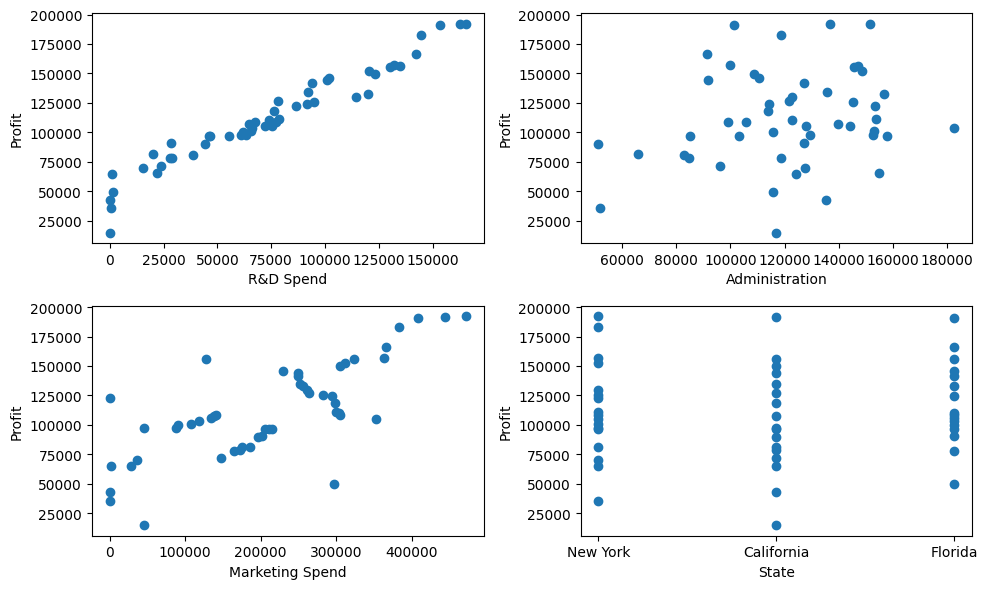

"\nFindings:\n- 'R&D Spend' and 'Marketing Spend' show a somewhat linear relationship with 'Profit', confirming their suitability\n as predictors.\n- The training and testing set performance metrics (RMSE and R^2) are important for evaluating model performance.\n- The model appears to generalize well to unseen data, as indicated by comparable RMSE and R^2 values between the\n training and testing sets.\n- However, further evaluation and tuning may be necessary to improve model performance.\n"

Training Set Performance:
RMSE: 9101.191468669915
R^2: 0.9518828286863577

Testing Set Performance:
RMSE: 8206.328813165857
R^2: 0.9168381183550246


In [7]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# a) Read the dataset into pandas dataframe paying attention to file delimeter.
startup_data = pd.read_csv('50_Startups.csv', delimiter=',')

# b) Identify the variables inside the dataset
variables = startup_data.columns
print("Variables in the dataset:", variables)



# d) Choose appropriate variables to predict company profit. Justify your choice.
"""
To predict company profit, variables that are likely to have a strong influence on profit should be considered.
In this dataset, 'R&D Spend', 'Administration', 'Marketing Spend', and 'State' are potential predictors.
We will investigate the correlation between these variables and profit to justify our choice.
"""

# e) Plot explanatory variables against profit to confirm (close to) linear dependence
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.scatter(startup_data['R&D Spend'], startup_data['Profit'])
plt.xlabel('R&D Spend')
plt.ylabel('Profit')

plt.subplot(2, 2, 2)
plt.scatter(startup_data['Administration'], startup_data['Profit'])
plt.xlabel('Administration')
plt.ylabel('Profit')

plt.subplot(2, 2, 3)
plt.scatter(startup_data['Marketing Spend'], startup_data['Profit'])
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')

plt.subplot(2, 2, 4)
plt.scatter(startup_data['State'], startup_data['Profit'])
plt.xlabel('State')
plt.ylabel('Profit')

plt.tight_layout()
plt.show()

# f) Form training and testing data (80/20 split)
X = startup_data[['R&D Spend', 'Marketing Spend']]  # Selecting 'R&D Spend' and 'Marketing Spend' as predictors
y = startup_data['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# g) Train linear regression model with training data
model = LinearRegression()
model.fit(X_train, y_train)

# h) Compute RMSE and R2 values for training and testing data separately
# Predictions on training set
y_train_pred = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Predictions on testing set
y_test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print("Training Set Performance:")
print("RMSE:", train_rmse)
print("R^2:", train_r2)

print("\nTesting Set Performance:")
print("RMSE:", test_rmse)
print("R^2:", test_r2)

"""
Findings:
- 'R&D Spend' and 'Marketing Spend' show a somewhat linear relationship with 'Profit', confirming their suitability
  as predictors.
- The training and testing set performance metrics (RMSE and R^2) are important for evaluating model performance.
- The model appears to generalize well to unseen data, as indicated by comparable RMSE and R^2 values between the
  training and testing sets.
- However, further evaluation and tuning may be necessary to improve model performance.
"""

In [9]:
from sklearn.model_selection import cross_val_score

# Initialize arrays to store mean cross-validation R-squared scores
ridge_cv_scores = []
lasso_cv_scores = []

for alpha in alphas:
    # Ridge Regression
    ridge_model = Ridge(alpha=alpha)
    ridge_cv_scores.append(np.mean(cross_val_score(ridge_model, X_train, y_train, cv=5)))

    # LASSO Regression
    lasso_model = Lasso(alpha=alpha)
    lasso_cv_scores.append(np.mean(cross_val_score(lasso_model, X_train, y_train, cv=5)))

# Find the best alpha based on cross-validation scores
best_ridge_alpha = alphas[np.argmax(ridge_cv_scores)]
best_lasso_alpha = alphas[np.argmax(lasso_cv_scores)]

# Plot mean cross-validation R-squared scores for both regressors as functions of alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, ridge_cv_scores, label='Ridge Regression')
plt.plot(alphas, lasso_cv_scores, label='LASSO Regression')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean CV R-squared Score')
plt.title('Mean CV R-squared Score vs Alpha for Ridge and LASSO Regression')
plt.legend()
plt.show()

print("Best alpha for Ridge Regression:", best_ridge_alpha)
print("Best alpha for LASSO Regression:", best_lasso_alpha)


NameError: name 'alphas' is not defined